## Interpretabilidad del modelo con SHAP

Para comprender cómo el modelo toma sus decisiones y qué variables influyen con mayor peso en la predicción del Síndrome de Bajo Gasto Cardíaco (SBGC), se utilizaron valores SHAP (*SHapley Additive exPlanations*). Esta técnica permite analizar la contribución de cada característica tanto a nivel global como individual.

En esta sección se presentan los siguientes gráficos:

- **Summary Plot**: muestra la importancia global de las variables y su impacto en la predicción.
- **Force Plot**: permite visualizar cómo se combinan las contribuciones de las variables en casos individuales.
- **Dependence Plot**: revela cómo varía la influencia de una característica según su valor y su interacción con otras.

Estos gráficos aportan una interpretación transparente y visual del RandomForestClassifier (modelo elegido), facilitando su aplicación en contextos clínicos.


## Puesta a punto

En la celda siguiente se cargan las librerías necesarias para garantizar el correcto funcionamiento del notebook.

In [1]:
import shap
import pandas as pd
import pickle
import os
import matplotlib.pyplot as plt

## Importación de los datos

En esta etapa se cargan los recursos necesarios para el análisis del modelo. Los datos se encuentran almacenados en formato tabular dentro de un archivo CSV, mientras que el modelo previamente entrenado fue guardado mediante la librería `pickle`. A continuación, se procede a su carga para iniciar el análisis.


In [2]:
os.chdir('../')

In [3]:
X = pd.read_csv('data/processed/dataset.csv')

In [4]:
# Cargar el RandomForestClassifier
with open('models/rf_model.pkl', 'rb') as file:
    rf_model = pickle.load(file)

In [5]:
# Mantener en el dataset solo las variables con las que el modelo fue entrenado
X = X[rf_model.feature_names_in_]

## Gráficos y conclusiones

In [6]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X)

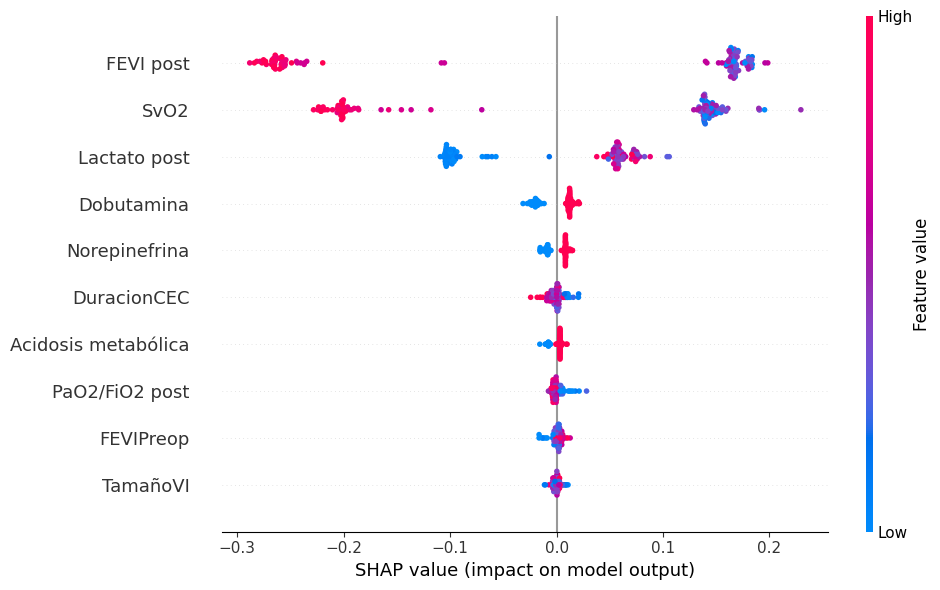

In [7]:
shap.summary_plot(shap_values[1], X, plot_type='dot', plot_size=[10,6], show=False)
plt.savefig('images/figures/shap_summary_plot.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

El análisis se centró en las tres características con mayor impacto en la predicción del modelo, según los valores SHAP: la fracción de eyección del ventrículo izquierdo en el posoperatorio (FEVI post), la saturación venosa mixta de oxígeno (SvO2) y los niveles de lactato posoperatorios (Lactato post). La interpretación de los resultados permite extraer conclusiones clínicas relevantes: valores bajos de FEVI posoperatorio y SvO2, así como valores elevados de lactato posoperatorio, se asocian con una mayor probabilidad de desarrollar el síndrome.

Estos hallazgos se visualizan con mayor claridad a través de los gráficos de dependencia generados para cada una de las variables, los cuales permiten observar el efecto de sus valores individuales en la predicción del modelo, así como posibles interacciones con otras características.

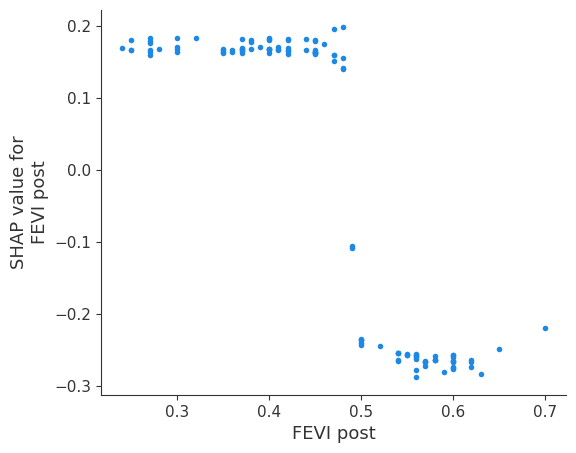

In [8]:
shap.dependence_plot('FEVI post', shap_values[1],
                     X, interaction_index=None, show=False)
plt.savefig('images/figures/shap_dependence_fevi.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

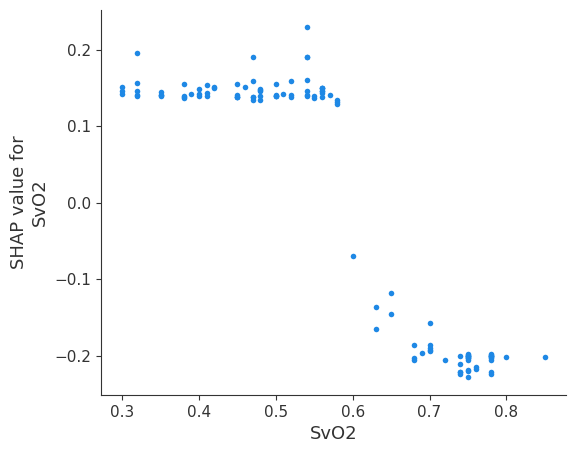

In [9]:
shap.dependence_plot('SvO2', shap_values[1],
                     X, interaction_index=None, show=False)
plt.savefig('images/figures/shap_dependence_svo2.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

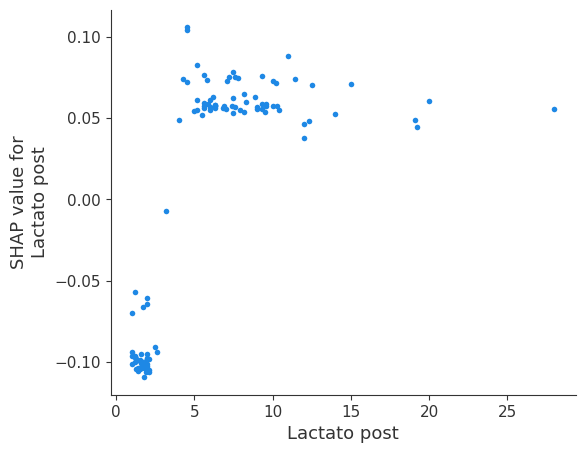

In [10]:
shap.dependence_plot('Lactato post', shap_values[1],
                     X, interaction_index=None, show=False)
plt.savefig('images/figures/shap_dependence_lactato.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

A partir del análisis de los gráficos de dependencia, es posible identificar umbrales clínicamente relevantes para las principales variables predictoras. En primer lugar, un valor de FEVI posoperatorio inferior al 50% se asocia de forma consistente con una mayor probabilidad de desarrollar el SBGC, lo cual concuerda con los criterios clínicos convencionales. De igual forma, una saturación venosa mixta de oxígeno (SvO2) por debajo del 60% parece ser un indicador determinante de diagnóstico positivo. Finalmente, los niveles de lactato posoperatorios muestran un impacto positivo considerable en la predicción cuando superan los 3mmol/L.

Estos patrones fueron validados también a nivel individual mediante el análisis local con SHAP. Para ello, se seleccionaron dos casos representativos: uno correspondiente a un paciente que desarrolló SBGC y otro que no lo presentó.

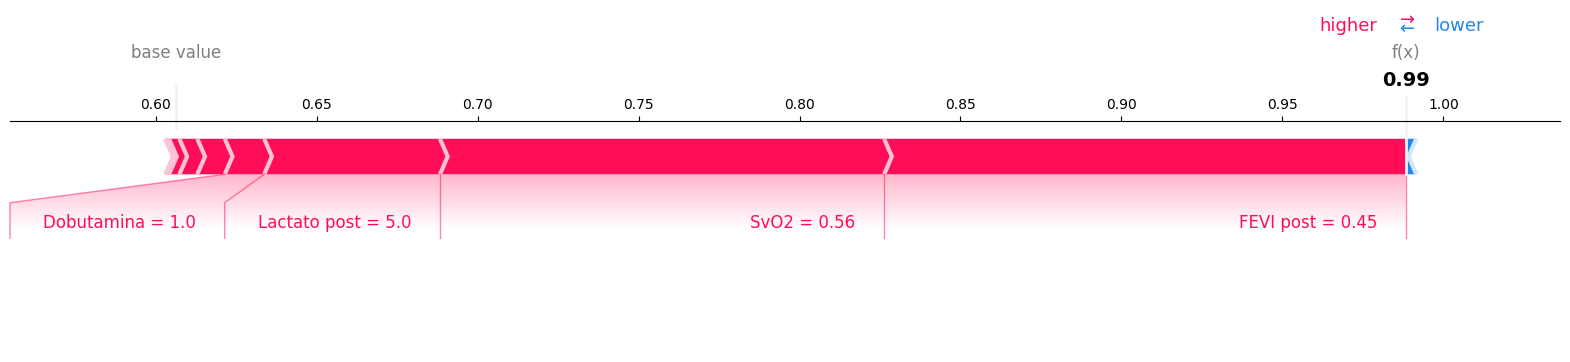

In [11]:
# Caso que presentó el síndrome
shap.plots.force(explainer.expected_value[1], shap_values[1][0], X.iloc[0], matplotlib=True, show=False)
plt.savefig('images/figures/shap_force_false.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close();

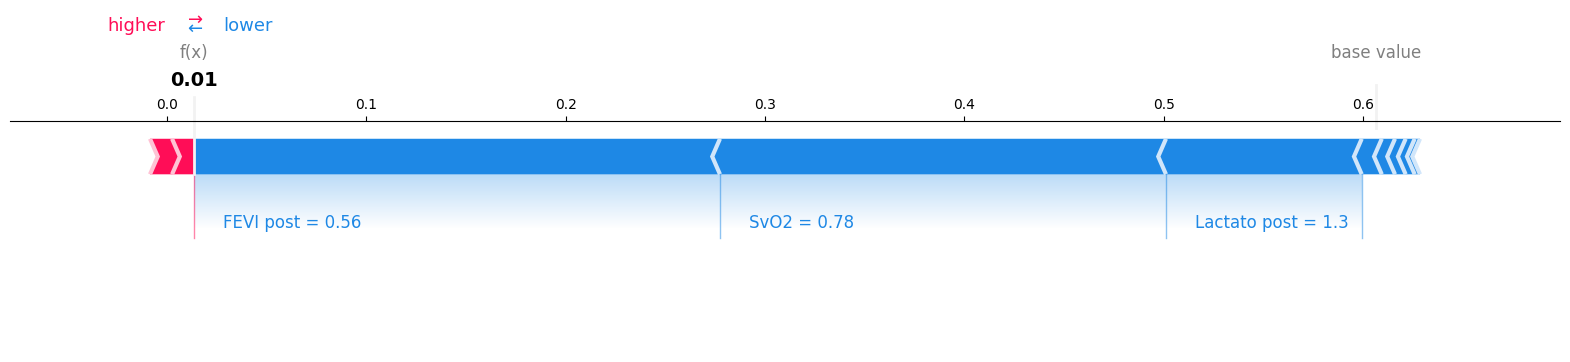

In [12]:
# Caso que no presentó el síndrome
shap.plots.force(explainer.expected_value[1], shap_values[1][1], X.iloc[1], matplotlib=True, show=False)
plt.savefig('images/figures/shap_force_true.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

En ambos casos se verificaron las relaciones previamente deducidas a partir de los gráficos de dependencia, confirmando que los umbrales identificados para FEVI posoperatorio, SvO2 y lactato posoperatorio se mantienen coherentes a nivel local. Asimismo, se verificó la relevancia relativa de estas tres variables como principales contribuyentes a la predicción del modelo.